# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Understanding the structure of the data

In [3]:
# read the data
data = pd.read_csv('foodhub_order.csv')

In [4]:
# taking a copy of dataset to another dataframe for analysis and retain the original one
df = data.copy()

In [5]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75000,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08000,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23000,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20000,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59000,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [6]:
df.shape #gives the shape of the dataset

(1898, 9)

#### Observations:


The given dataset has got 1898 observations and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [7]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1. info() provides the summary information on all the columns for the 1898 entries.
2. Dataframe has 9 columns and all of them have data present for all 1898 rows. So there is no missing values in the dataset.  
3. In the dataset, there are 4 integer columns, 4 String columns (object type) and 1 floating point variable.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [8]:
# converting "objects" to "category" reduces the data space required to store the dataframe
# code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type']    = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:


'restaurant_name','cuisine_type','day_of_the_week' are converted to 'Category' type.
Now the dataframe has 3 Categorical, 4 integer, 1 Object and 1 Float variables.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [9]:
df.describe().T # Using describe function to get summary statistics on numeric variables

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00000,1477495.50000,548.04972,1476547.00000,1477021.25000,1477495.50000,1477969.75000,1478444.00000
customer_id,1898.00000,171168.47840,113698.13974,1311.00000,77787.75000,128600.00000,270525.00000,405334.00000
cost_of_the_order,1898.00000,16.49885,7.48381,4.47000,12.08000,14.14000,22.29750,35.41000
food_preparation_time,1898.00000,27.37197,4.63248,20.00000,23.00000,27.00000,31.00000,35.00000
delivery_time,1898.00000,24.16175,4.97264,15.00000,20.00000,25.00000,28.00000,33.00000


#### Observations:


describe() function gives the 5 point Summary of all the numeric variables in the dataframe. 
1. Here the Count shows none of the variables have missing values. Order_id and customer_id though are numeric variables, we are not really going to perform any mathematical operations on these unique Ids. So need not look at the other summary statistics.
2. 'food_preparation_time' and 'delivery_time' doesn't look to have much outliers; since the difference between 3rd quartile and maximum value is not too high. 
3. 'cost_of_the_order' also looks to have not many outliers. 

#### We could find the similar summary statistics for non-numerical columns:

In [10]:
df.describe(exclude='number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


1. There looks 14 different Cuisines listed out of which American was highest ordered. 
2. Only 2 different values in 'day_of_the_week'; weekend having more frequency; so more orders on weekends compared to weekdays.
3. Rating was not given by almost 38% of the customers who ordered food thru FoodHub.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [11]:
df.columns # gives the list of columns in the dataframe, so we can get the exact column name for further analysis.

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [12]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


736 orders were not rated. value_counts give the count of unique values in the Series.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

## Observations on 'cost_of_the_order'

Text(0.5, 0, 'Cost of the order')

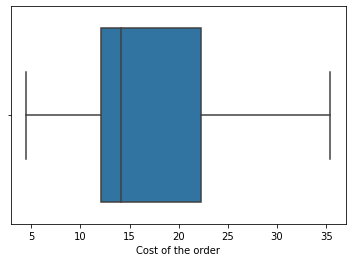

In [13]:
sns.boxplot(df['cost_of_the_order'])
plt.xlabel('Cost of the order')

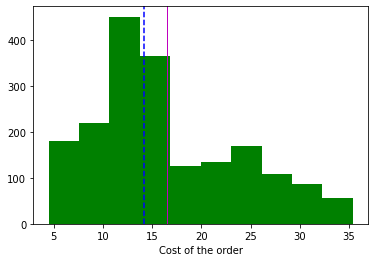

In [14]:
plt.hist(df['cost_of_the_order'],color='g')
plt.xlabel('Cost of the order')
plt.axvline(df['cost_of_the_order'].mean(),color='m',linewidth=1)
plt.axvline(df['cost_of_the_order'].median(),color='b',linestyle='dashed')

<AxesSubplot:xlabel='cost_of_the_order'>

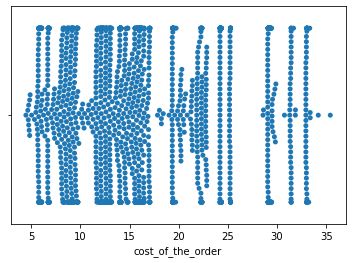

In [15]:
sns.swarmplot(df['cost_of_the_order'])

**Observations**
* The cost of the orders ranged from around 5 till 35 dollars and about 50% of orders cost is between 12 and 22 dollars.
* The Median value is at 14 and Mean=16.

## Observations on 'rating'

Text(0.5, 0, 'Customer Rating')

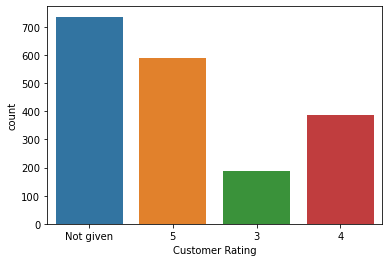

In [16]:
sns.countplot(df['rating'])
plt.xlabel("Customer Rating")

**Observations on 'rating'**
* A majority of orders have a rating of 'Not given'. 
* Out of the ratings provided by Customers, majority orders have got a rating of 5 and very less orders have got 3.
Customers does look to have a good feedback on FoodHub.

## Observations on 'food_preparation_time'

Text(0.5, 0, 'Food Preparation Time')

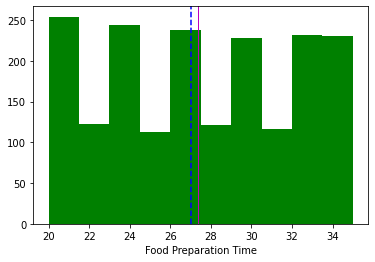

In [17]:
plt.hist(df['food_preparation_time'],color='g')
plt.axvline(df['food_preparation_time'].mean(),color='m',linewidth=1)
plt.axvline(df['food_preparation_time'].median(),color='b',linestyle='dashed')
plt.xlabel('Food Preparation Time')

<AxesSubplot:xlabel='food_preparation_time', ylabel='Density'>

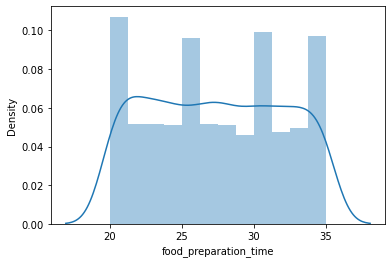

In [18]:
sns.distplot(df['food_preparation_time'])

Text(0.5, 0, 'Food Preparation Time')

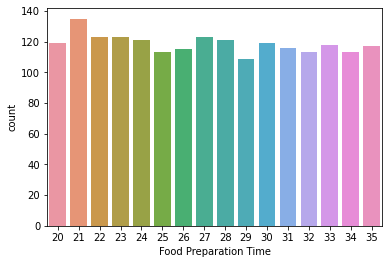

In [19]:
sns.countplot(df['food_preparation_time'])
plt.xlabel('Food Preparation Time')

**Observation**
* The food preparation time is from the range of 20-35 minutes and doesnt have much outliers.
* It is almost equally distributed across all over the range. 
* The Mean and Median values are also close by.

## Observations on 'delivery_time'

Text(0.5, 0, 'Delivery Time')

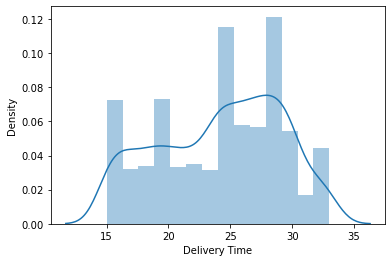

In [20]:
sns.distplot(df['delivery_time'])
plt.xlabel('Delivery Time')

Text(0.5, 0, 'Delivery Time')

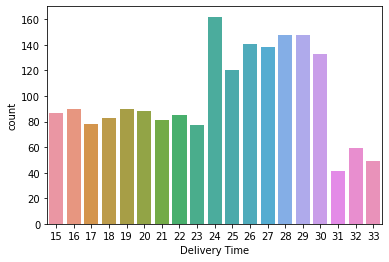

In [21]:
sns.countplot(df['delivery_time'])
plt.xlabel('Delivery Time')

**Observations on 'devliery_time'**
* The delivery_time is in a range of 15-33 minutes.
* A good number of orders were delivered in 24-30 minutes range.
* However there are some which took around 33 minutes to deliver. There would be multiple factors which impact delivery_time, like distance, traffic at the time of delivery etc; which are not provided in our dataset here.

## Observations on 'cuisine_type'

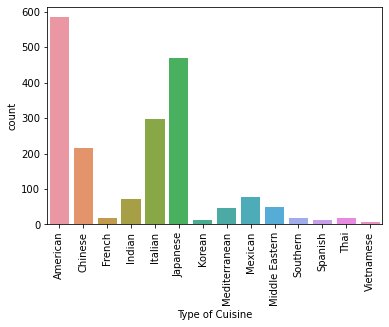

In [22]:
sns.countplot(df['cuisine_type'])
plt.xticks(rotation=90)
plt.xlabel('Type of Cuisine')
plt.show()

**Observations**
* This shows the 'American' cuisine is the most ordered cuisine.
* The second top most ordered is the Japanese cuisine.
* The least times ordered is the Vietnamese cuisine.

## Observations on 'day_of_the_week'

Text(0.5, 0, 'Day of the week')

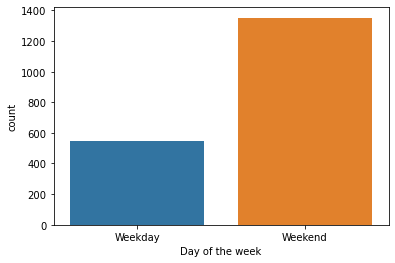

In [23]:
sns.countplot(df['day_of_the_week'])
plt.xlabel('Day of the week')

**Observations**
* The number of orders is more on weekend compared to weekday. People would love to enjoy outside food on a holiday!

## Observations on 'restaurant_name'

In [24]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

<AxesSubplot:>

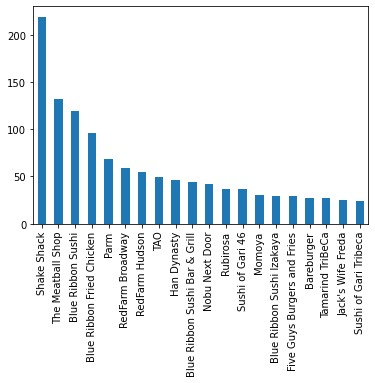

In [25]:
df['restaurant_name'].value_counts()[:20].plot(kind='bar') 

**Observations**
* This plot shows the top 20 restaurants based on the number of orders they received. 
* Shake Shack, The Meatball Shop and Blue Ribbon Sushi being the top 3 in the list..

In [26]:
df['customer_id'].value_counts().head(10).rename_axis('CustId').reset_index(name='counts')

,CustId,counts
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7
5,259341,7
6,82041,7
7,276192,7
8,115213,6
9,97079,6


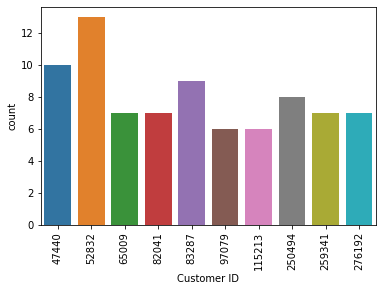

In [27]:
df_topcust=df[df.customer_id.isin([52832,47440,83287,250494,65009,259341,82041,276192,115213,97079])]
sns.countplot(data=df,x=df_topcust['customer_id'])
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.show()

**Observations**
* The count plot shows the number of times each of these top 10 customers ordered.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [28]:
#value_counts give the descending order of count of unique values; 
#so picking head gives the top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head().rename_axis('Restaurant Name').reset_index(name='counts')

,Restaurant Name,counts
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


The 5 restaurants that received the highest number of orders are below:

    Shake Shack,
    The Meatball Shop,
    Blue Ribbon Sushi,
    Blue Ribbon Fried Chicken and 
    Parm

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [29]:
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

**Observations**
* The most popular cuisine on weekends is 'American'.

The same can be achieved with a plot as below:

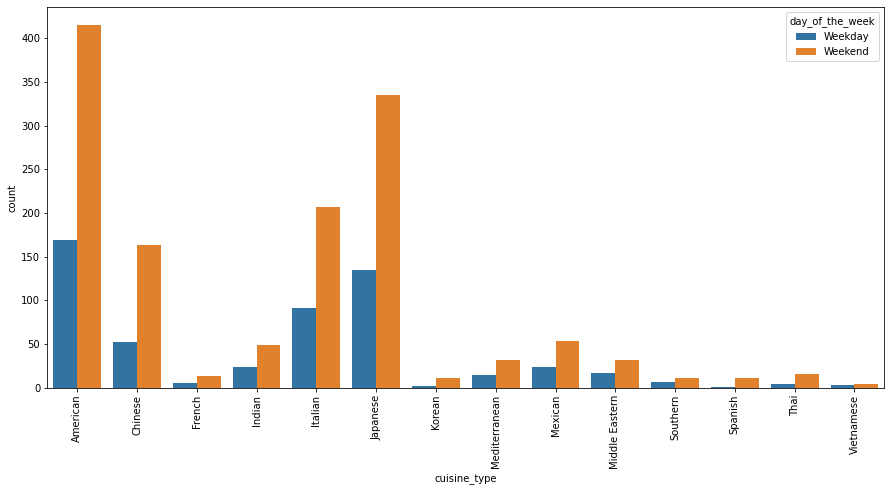

In [30]:
plt.figure(figsize=(15, 7))
sns.countplot(df['cuisine_type'],hue=df['day_of_the_week'])
plt.xticks(rotation=90);
plt.show()

#### Observations:


In the plot as well, it shows 'American' is the most popular cuisine in the Weekend.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [31]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [32]:
orders_cost_gt20=df.loc[(df['cost_of_the_order'] > 20)].shape[0] # To find number of orders where cost is >$20
print('Total number of orders where cost is above 20 dollars:',orders_cost_gt20)

total_no_orders=df.shape[0] # Total orders in the dataset

percent=(orders_cost_gt20) / (total_no_orders) #To find the percentage 
print('Percentage of orders where cost is above 20 dollars: {:2.2%}'.format(percent))

Total number of orders where cost is above 20 dollars: 555
Percentage of orders where cost is above 20 dollars: 29.24%


#### Observations:


There are 555 orders where the cost is more than $20; and this constitutes to a 29.2% of the total number of orders in the dataset.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [33]:
avg_del_time=df['delivery_time'].mean()
print(avg_del_time)
print('Average delivery time from all these orders: {:.2f} minutes'.format(avg_del_time))

24.161749209694417
Average delivery time from all these orders: 24.16 minutes


#### Observations:


The Mean delivery time from all these observations in the dataset is 24.16 minutes. So as per our dataset; on an average, it takes 24 minutes for the delivery person to deliver the food package.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [34]:
print('Customer who has spent maximum amount on a single order: ')
df.loc[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

Customer who has spent maximum amount on a single order: 


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41000,Weekday,4,21,29


#### Observations:


Customer with id 62359 has spent the maximum amount on a single order and is eligible for \\$15 coupon that the Company decided to offer. The order is of Mediterranean cuisine from Pylos restaurant and it costed $35.41.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

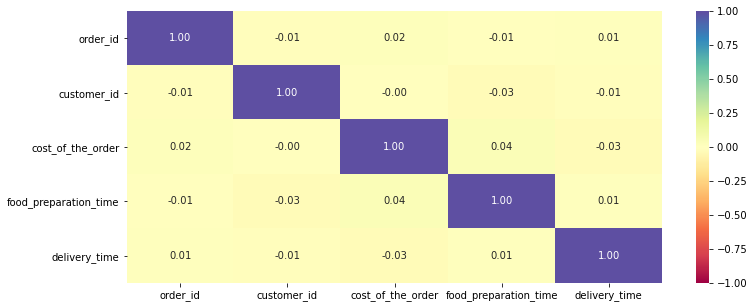

In [35]:
corr=df.corr()
# plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**Observations**
* There doesnt seem to be any strong correlation between any of these numeric variables.
* Food preparation time and delivery time also doesn't have any correlation with the provided variables.

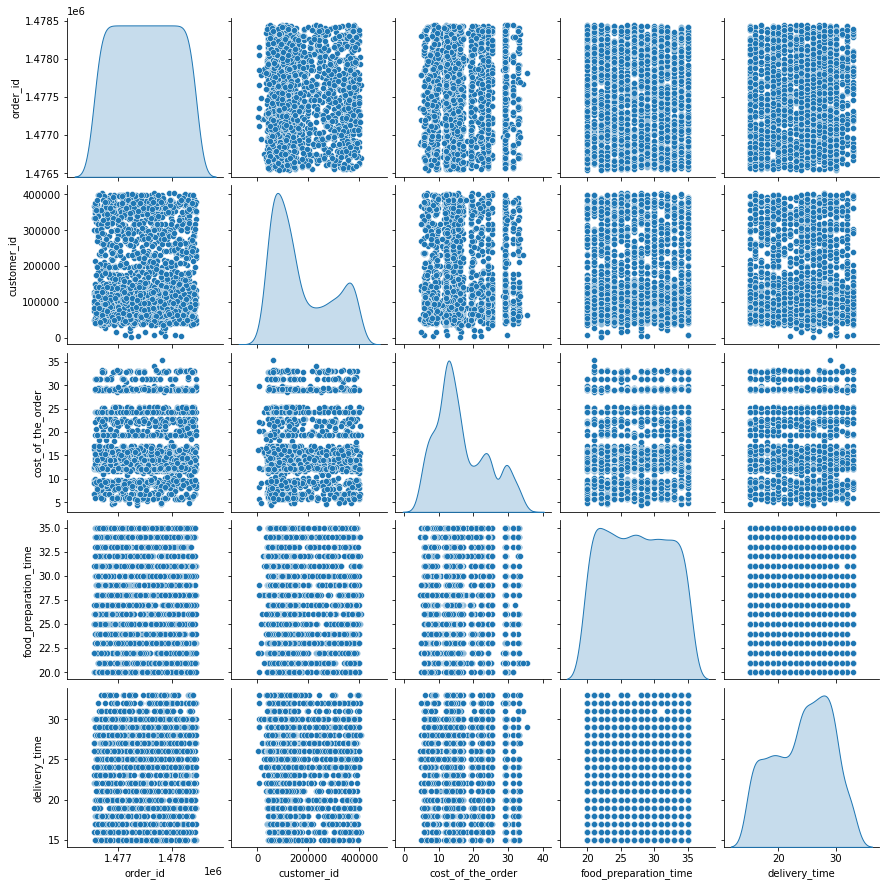

In [36]:
sns.pairplot(df,diag_kind="kde")
plt.show()

**Observations**
* The pair plot also shows the same, not a strong correlation between any 2 variables.

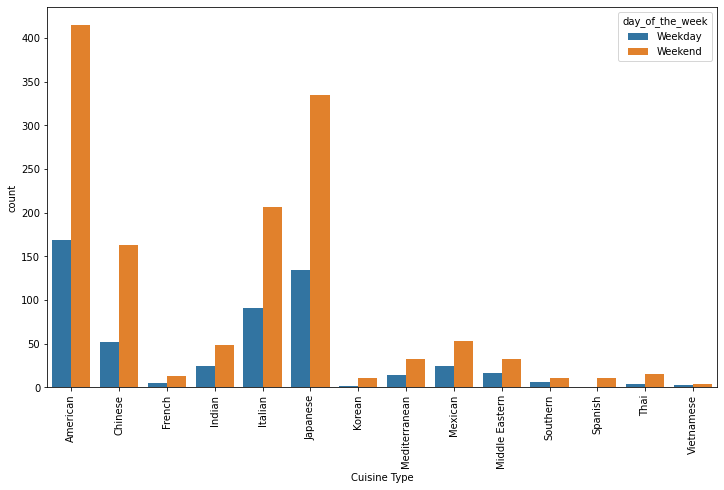

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.show()

**Observations**
* American cuisine is the top most ordered cuisine, be it a weekday or a weekend.

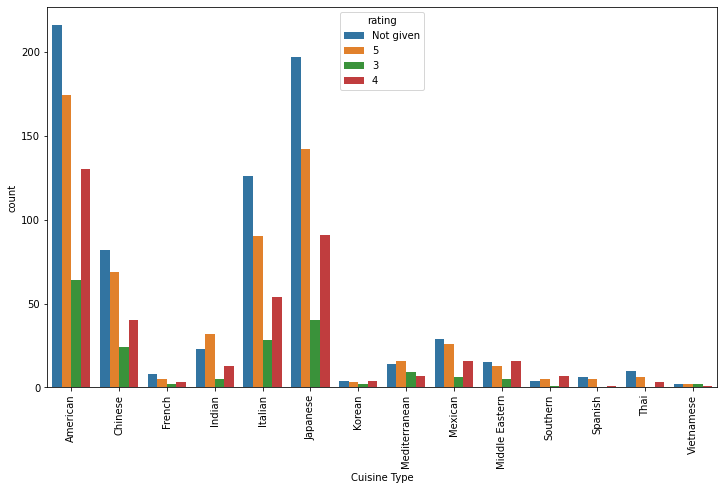

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='cuisine_type',hue='rating')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.show()

**Observations**
* The above plot shows that American Cuisine has got more orders and it has got majority of rating as 5.

Text(0.5, 0, 'Highest ordered American Restaurants')

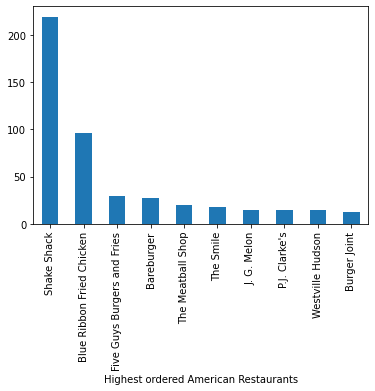

In [39]:
df.loc[df['cuisine_type']== 'American']['restaurant_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Highest ordered American Restaurants')

**Observations**
* The highest ordered cuisine is American and these are top 10 restaurants from the list that serve American cuisine.

In [40]:
df.loc[df['cuisine_type']== 'American']['cost_of_the_order'].mean()

16.319828767123287

In [41]:
df.loc[df['cuisine_type']== 'American']['rating'].value_counts()

Not given    216
5            174
4            130
3             64
Name: rating, dtype: int64

Text(0, 0.5, 'Count of orders-Weekday')

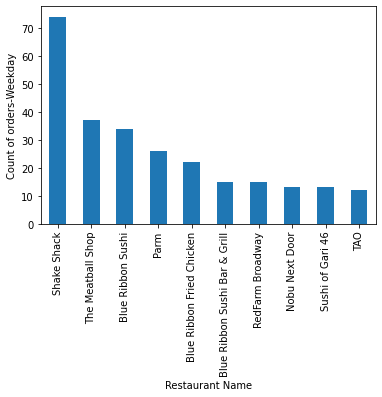

In [42]:
df.loc[df['day_of_the_week']== 'Weekday']['restaurant_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Restaurant Name')
plt.ylabel('Count of orders-Weekday')

**Observations**
* On a weekday, these are the top 10 restaurants that get most orders.

Text(0, 0.5, 'Count of orders-Weekend')

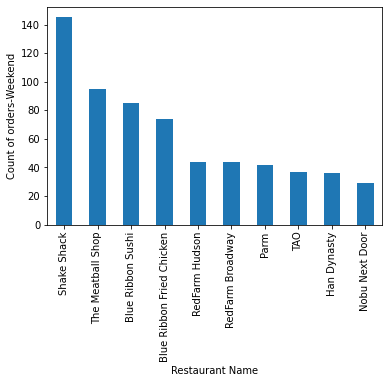

In [43]:
df.loc[df['day_of_the_week']== 'Weekend']['restaurant_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Restaurant Name')
plt.ylabel('Count of orders-Weekend')

**Observations**
* On a weekend, these are the top 10 restaurants that get most orders.

In [44]:
(df['restaurant_name'].value_counts().head()).rename_axis('restaurant_name').reset_index(name='counts')

,restaurant_name,counts
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


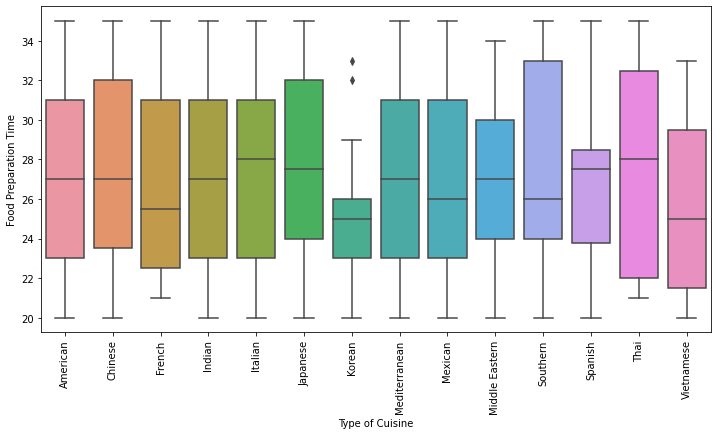

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y='food_preparation_time',x='cuisine_type')
plt.ylabel('Food Preparation Time')
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='food_preparation_time', ylabel='cuisine_type'>

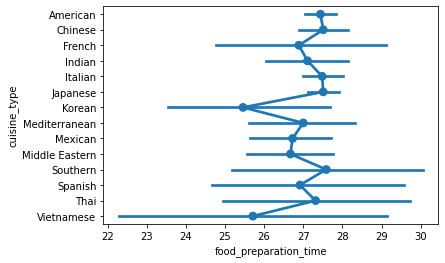

In [46]:
sns.pointplot(data=df,x='food_preparation_time',y='cuisine_type')

**Observations**
* Almost all the cuisines have an average food preparation time; only Korean Cuisine has some outliers on the top.
* Except for Korean, Spanish and Middle Eastern, most of the other cuisines have the same Inter Quartile range IQR (Q3-Q1).

In [47]:
df.groupby([df['cuisine_type'],df['day_of_the_week']])['food_preparation_time'].mean()

cuisine_type    day_of_the_week
American        Weekday           27.40828
                Weekend           27.45301
Chinese         Weekday           28.07692
                Weekend           27.33129
French          Weekday           27.20000
                Weekend           26.76923
Indian          Weekday           26.33333
                Weekend           27.48980
Italian         Weekday           27.41758
                Weekend           27.51208
Japanese        Weekday           27.28148
                Weekend           27.60299
Korean          Weekday           23.00000
                Weekend           25.90909
Mediterranean   Weekday           25.78571
                Weekend           27.53125
Mexican         Weekday           25.62500
                Weekend           27.22642
Middle Eastern  Weekday           27.23529
                Weekend           26.37500
Southern        Weekday           26.16667
                Weekend           28.36364
Spanish         Weekda

**Observations**
* For all the cuisines the average food preparation time does not vary much, irrespective of the weekday or the weekend exept for Spanish, Vietnamese and Korean.

Text(0, 0.5, 'Day of the Week')

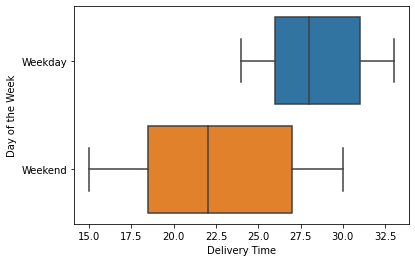

In [48]:
sns.boxplot(data=df,x='delivery_time',y='day_of_the_week')
plt.xlabel('Delivery Time')
plt.ylabel('Day of the Week')

**Observations**
* The box plot shows that on Weekend the delivery time taken is less when compared to Weekday.
* So this shows Delivery time is correlated with the Day of the week.

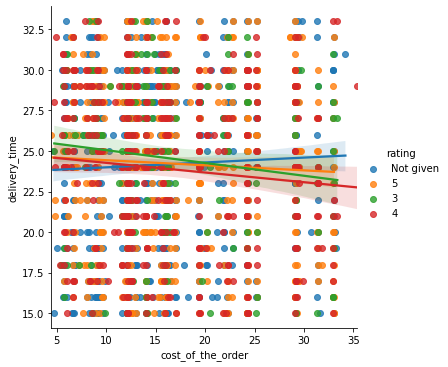

In [49]:
sns.lmplot(data=df,x='cost_of_the_order',y='delivery_time',hue='rating')

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [50]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [51]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [52]:
#Trying to fix the 'Not given' values in 'rating' by first replacing with 0
replace_ratng = {"rating":     {"Not given": 0}}
df1=df.copy()
df1= df1.replace(replace_ratng)
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75000,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08000,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23000,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20000,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59000,Weekday,4,25,24


In [53]:
#converting to integer to find out stats and see what the 0 could be replaced with 
df1['rating']=df1['rating'].astype('int32')
df1['rating'].dtype

dtype('int32')

In [54]:
#calcualte mean, median and mode of the observations
mean=df1['rating'].mean()
print('Mean:', mean)
median=df1['rating'].median()
print('Median:', median)
mode=df1['rating'].mode()
print('Mode:', mode)

Mean: 2.6596417281348788
Median: 4.0
Mode: 0    0
dtype: int32


Mean is highly impacted by Outliers and Mode, the highest frequency value, is 0 in this dataset. So Median value looks more appropriate to use, for replacing all '0' rating observations. 

In [55]:
replace_ratng = {"rating":     {0: 4}}
df1 = df1.replace(replace_ratng)
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75000,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08000,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23000,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20000,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59000,Weekday,4,25,24


In [56]:
df1['rating'].mean()

4.2107481559536355

In [57]:
r1=df1.groupby(by='restaurant_name')['rating'].count().sort_values(ascending=False)
r2=df1.groupby(by='restaurant_name')['rating'].mean()
df2=pd.merge(r1,r2,how='inner',on='restaurant_name')
df2.loc[(df2['rating_x'] > 50) & (df2['rating_y'] > 4)]

,rating_x,rating_y
restaurant_name,,
Shake Shack,219,4.16895
The Meatball Shop,132,4.32576
Blue Ribbon Sushi,119,4.13445
Blue Ribbon Fried Chicken,96,4.21875
Parm,68,4.07353
RedFarm Broadway,59,4.16949
RedFarm Hudson,55,4.10909


#### Observations:
Missing Value treatment - For all orders where 'rating' was 'Not given'; it has been replaced with the Median value of 4 as rating.
Upon doing that, these are the restaurants to get the promotional offer FoodHub Company is going to provide:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm
* RedFarm Broadway
* RedFarm Hudson

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [58]:
df[df['cost_of_the_order']<5]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
82,1477790,133617,Shake Shack,American,4.75000,Weekday,4,35,28
390,1477196,50123,Cafe Habana,Mexican,4.85000,Weekend,5,28,22
480,1476877,53289,The Loop,Japanese,4.66000,Weekend,Not given,34,25
542,1477788,270444,P.J. Clarke's,American,4.71000,Weekend,Not given,23,15
624,1477349,52327,Nobu Next Door,Japanese,4.47000,Weekend,5,28,26
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85000,Weekend,5,20,21
889,1477787,14869,Shake Shack,American,4.80000,Weekend,4,22,24
1569,1477786,145389,RedFarm Hudson,Chinese,4.75000,Weekend,3,23,25
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90000,Weekday,4,29,32


In [59]:
chrgs_order_gt20=(df.loc[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25).sum()
chrgs_order_gt5=(df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order']<20)]['cost_of_the_order'] * 0.15).sum()
print(chrgs_order_gt20)
print(chrgs_order_gt5)
print('Net revenue generated by Food Hub Company: ${:.2f}'.format(chrgs_order_gt20 + chrgs_order_gt5))

3688.7275
2477.5755
Net revenue generated by Food Hub Company: $6166.30


In [60]:
df[df['cost_of_the_order']==20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### Observations:


Assuming there is no revenue generated for orders with <\\$5, the net revenue generated by the Food Hub company is \\$6166.30

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [61]:
percent=df.loc[df['delivery_time'] + df['food_preparation_time'] > 60].shape[0] / df.shape[0]

print('Percentage of orders that have total delivery time of more than 60 mins: {:.2%}'.format(percent))

Percentage of orders that have total delivery time of more than 60 mins: 10.54%


#### Observations:


There are 200 out of 1898 orders, where the total time took for delivery is more than 60 mins. This constitutes to 10.5% of the data.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [62]:
df.groupby(by='day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34004
Weekend   22.47002
Name: delivery_time, dtype: float64

In [63]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### Observations:


The average delivery time on weekends is 22 mins and on weekdays is 28 mins. So delivery time is more for weekdays, which is understandable considering the heavy traffic on working days.

In [64]:
from pandas_profiling import ProfileReport
prof_rprt = ProfileReport(data)
prof_rprt

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
# to save report obtained via pandas profiling
prof_rprt.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:

## Conclusion
A dataset of FoodHub's order details were analyzed, which contained a total of 1898 observations with 9 data attributes. The data had orders received from a range of 14 cuisines and 179 different restaurants in Newyork.
The data contained the food preparation time, delivery time and cost of the order along with a customer provided rating. 
The objective of the analysis was to understand the trend of data and know about the demand of the different restaurants to enhance customer experience.

From the data analysis we could figure out that-
1. American cuisine is the top most ordered cuisine.
2. Food preparation and delivery time has not much correlation with the rating that customer provided.
3. For most of the cuisines, the average food preparation time is the same for Weekend vs Weekday except for Korean, Vietnamese and Spanish.
3. Delivery time has correlation with the Day of the week; on weekends the time taken for delivery is more.
4. Order Id is a unique id for a order, cannot figure out much from it.
5. Customer Id is a unique id for a customer, it shows certain customers who places more number of orders. 
6. Cost of the order also doesnt show any correlation to rating.

## Recommendations
* From the data analysis, it is evident that American cuisine is the top most ordered cuisine and Japanese being the second top. Vietnamese has very less number of orders.

* There are certain customers who ordered many times, so some kind of deals to them can get more Business to FoodHub and a better experience for customer.

* The number of orders are more on Weekends and the delivery time taken is also more, compared to weekdays. 
So it is clearly understood that there is more demand on weekends, so FoodHub can have more number of delivery people for Weekend deliveries. This way the delivery time could get reduced and customer would be happy.


## Further analysis:
FoodHub can improve their customer experience by taking care of certain factors like quicker deliveries. But in this dataset there is no attributes which would really imapct the delivery time, like distance, traffic situations, weather conditions. It would be good to have these data attributes too, to further analyze on ehancing the delivery times.
Food Preparation time is not really in the control of FoodHUb, its upto each of the restaurants that Customers place an order for. Also good quality and taste of the food enhances customer's experience; but there are no such attributes in this dataset. 
